### Here the project is separated by parts to see how it works.

Here we ask the symptoms based on the decision tree in order to ask as little questions as possible in order to optimize the program.

![WhatsApp Image 2025-05-04 at 21.21.00_feaa2e36.jpg](<attachment:WhatsApp Image 2025-05-04 at 21.21.00_feaa2e36.jpg>)
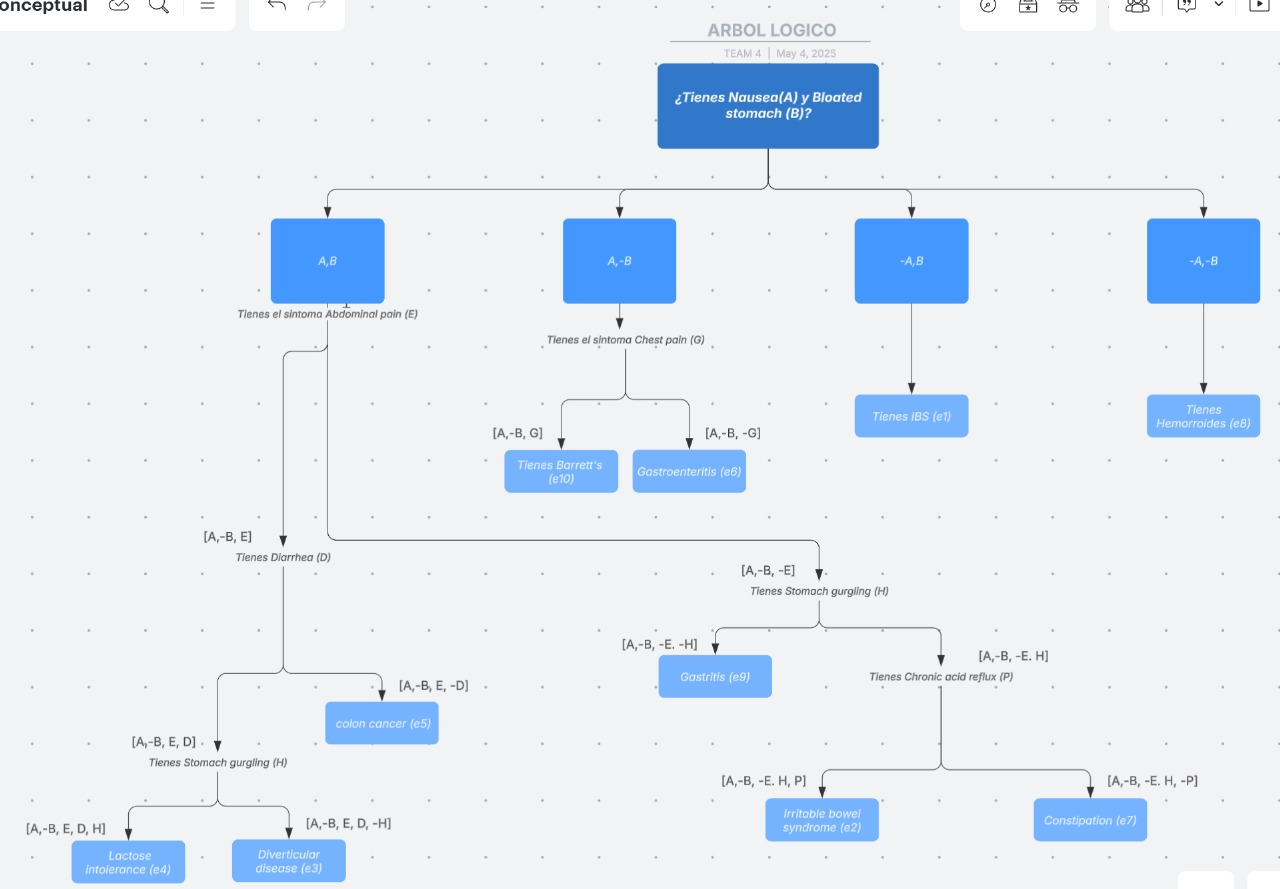

In [ ]:
from experta import *

class diagnosis(KnowledgeEngine):

    @DefFacts()
    def _initial_action(self):
        print("Welcome to the medical diagnosis system.")
        print("Please answer the following questions with 'y' for yes, or 'n' for no, no other input is available.")
        symptom = {}
        symptom['A']= input("Do you have a nausea? (y/n): ").strip().lower()== 'y'
        symptom['B']= input("Do you have a bloated stomach? (y/n: ").strip().lower() == 'y'
        if symptom['A'] and symptom['B']:
            symptom['E']= input("Do you have abdominal pain? (y/n): ").strip().lower()== 'y'
            if symptom['E']:
                symptom['D']= input("Do you have a diharrea? (y/n): ").strip().lower()== 'y'
                if symptom['D']:
                    symptom['H']= input("Do you have a gurgling stomach? (y/n): ").strip().lower()== 'y'
                else:
                    symptom['H']= False
            else:
                symptom['H']=input("Do you have a gurgling stomach? (y/n): ").strip().lower()== 'y'
                if symptom['H']:
                    symptom['P']= input("Do you have acid reflux? (y/n): ").strip().lower()== 'y'
                else:
                    symptom['P']= False
        elif symptom['A'] and not symptom['B']:
            symptom['G']= input("Do you have chest pain? (y/n): ").strip().lower()== 'y'

Then we make the rules to decide which illness the patients has based in the dictionary created to store the answers from the patient.

In [ ]:
class diagnosis(KnowledgeEngine):
    
        @Rule(Symptom(A=True, B=True, E=True, D=True, H=True))
        def lactose_intolerance(self):
            """If the user has nausea, bloated stomach, abdominal pain, diharrea and gurgling stomach,
            the user is diagnosed with lactose intolerance.
            """
            print("\nDiagnostic: you have Lactose intolerance")

        @Rule(Symptom(A=True, B=True, E=True, D=True, H=False))
        def diverticular_disease(self):
            """If the user has nausea, bloated stomach, abdominal pain, diharrea and no gurgling stomach,
            the user is diagnosed with diverticular disease.
            """
            print("\nDiagnostic: you have Diverticular disease")

        @Rule(Symptom(A=True, B=True, E=True, D=False))
        def colon_cancer(self):
            """If the user has nausea, bloated stomach, abdominal pain and no diharrea,
            the user is diagnosed with colon cancer.
            """
            print("\nDiagnostic: you have Colon cancer")

        @Rule(Symptom(A=True, B=True, E=False, H=False))
        def gastritis(self):
            """If the user has nausea, bloated stomach and no abdominal pain and no gurgling stomach,
            the user is diagnosed with gastritis.
            """
            print("\nDiagnostic: you have Gastritis")

        @Rule(Symptom(A=True, B=True, E=False, H=True, P=True))
        def ibs_e2(self):
            """If the user has nausea, bloated stomach, no abdominal pain, gurgling stomach and acid reflux,
            the user is diagnosed with irritable bowel syndrome.
            """
            print("\nDiagnostic: you have Irritable bowel syndrome")

        @Rule(Symptom(A=True, B=True, E=False, H=True, P=False))
        def constipation(self):
            """If the user has nausea, bloated stomach, no abdominal pain, gurgling stomach and no acid reflux,
            the user is diagnosed with constipation.
            """
            print("\nDiagnostic: you have Constipation")

        @Rule(Symptom(A=False, B=True))
        def ibs_e1(self):
            """If the user has no nausea, bloated stomach,
            the user is diagnosed with irritable bowel syndrome.
            """
            print("\nDiagnostic: you have IBS")

        @Rule(Symptom(A=True, B=False, G=True))
        def barretts(self):
            """If the user has nausea, no bloated stomach and chest pain,
            the user is diagnosed with Barrett's esophagus.
            """
            print("\nDiagnostic: you have Barrett's ")

        @Rule(Symptom(A=True, B=False, G=False))
        def gastroenteritis(self):
            """If the user has nausea, no bloated stomach and no chest pain,
            the user is diagnosed with gastroenteritis.
            """
            print("\nDiagnostic: you have Gastroenteritis")

        @Rule(Symptom(A=False, B=False))
        def hemorroides(self):
            """If the user has no nausea and no bloated stomach,
            the user is diagnosed with hemorroides.
            """
            print("\nDiagnostic: you have Hemorroides")

Finally we start the engine and the interactive menu for the patient and ask if it needs more than one diagnosis.

In [ ]:
questions = diagnosis() # Create an instance of the diagnosis class
while True: # Start the loop to ask the user for input in case of wanting to do another diagnosis or an error
    try:
        questions.reset() # Reset the engine to clear previous facts and rules
        questions.run() # Run the engine to process the facts and rules
        again = input("Do you want to do another diagnosis? (y/n): ").strip().lower()
        if again != 'y': # If the user does not want to do another diagnosis, break the loop
            break  
    except Exception as e: # Catch any exceptions that occur during the execution of the engine
        # Print the error message and break the loop
        print(f"An error occurred: {e}")
        break
    finally: # This block will always execute, regardless of whether an exception occurred or not
        # Print a message indicating that the program is ending
        print("Thank you for using the medical diagnosis system.")
        print("Goodbye!")

### References

Acid reflux & gerd: What to know. Cleveland Clinic. (2025a, April 25). https://my.clevelandclinic.org/health/diseases/17019-acid-reflux-gerd 

Barrett’s esophagus: When chronic acid reflux causes permanent changes. Cleveland Clinic. (2025b, March 19). https://my.clevelandclinic.org/health/diseases/14432-barretts-esophagus 

Colon cancer (colorectal cancer). Cleveland Clinic. (2025c, April 25). https://my.clevelandclinic.org/health/diseases/14501-colorectal-colon-cancer 

Constipation. Cleveland Clinic. (2025d, April 30). https://my.clevelandclinic.org/health/diseases/4059-constipation 

Diverticulosis. Cleveland Clinic. (2025e, March 19). https://my.clevelandclinic.org/health/diseases/24883-diverticulosis 

Gastritis & what it means. Cleveland Clinic. (2025f, March 19). https://my.clevelandclinic.org/health/diseases/10349-gastritis 

Gastroenteritis: Sick in your stomach and intestines. Cleveland Clinic. (2025g, April 21). https://my.clevelandclinic.org/health/diseases/gastroenteritis 

Hemorrhoids treatment, symptoms, causes & prevention. Cleveland Clinic. (2025h, April 30). https://my.clevelandclinic.org/health/diseases/15120-hemorrhoids 

Lactose intolerance. Cleveland Clinic. (2025i, March 19). https://my.clevelandclinic.org/health/diseases/7317-lactose-intolerance 

professional, C. C. medical. (2025a, February 4). What are gastrointestinal (GI) diseases?. Cleveland Clinic. https://my.clevelandclinic.org/health/articles/7040-gastrointestinal-diseases 

professional, C. C. medical. (2025b, April 21). Indigestion: Symptoms, causes & how to find relief. Cleveland Clinic. https://my.clevelandclinic.org/health/symptoms/7316-indigestion-dyspepsia 

What is irritable bowel syndrome (IBS)?. Cleveland Clinic. (2025j, April 25). https://my.clevelandclinic.org/health/diseases/4342-irritable-bowel-syndrome-ibs 
